In [1]:
import pandas as pd
from collections import Counter
from itertools import chain
import pm4py

In [2]:
df_verslagen_clean = pd.read_csv('a:/df_verslagen_cleaned.csv')
df_verslagen_clean.head()

,pseudo_id,verslagen_report_tags,verslagen_report_content,verslagen_report_start_date,verslagen_report_content_cleaned,content_words,content_words_lemmatized
0,046D1FFEBDD40E1665D0ABA6DD8FC9F8BC4351C6,Klinische Brief,"Dhr. A.J. Dingemans, huisarts\r\n[STREETNAME] ...",2020-11-26 15:06:00,dhr aj dingemans huisarts streetname nr city d...,"['dhr', 'aj', 'dingemans', 'huisarts', 'street...","['dhr', 'aj', 'dingemans', 'huisarts', 'street..."
1,046D1FFEBDD40E1665D0ABA6DD8FC9F8BC4351C6,"Consult, Kliniek: vervolgconsult",Samenvatting: \nRectaal bloedverlies obv diver...,2020-11-26 09:53:00,samenvatting rectaal bloedverlies obv divertik...,"['samenvatting', 'rectaal', 'bloedverlies', 'o...","['samenvatting', 'rectaal', 'bloedverlie', 'ob..."
2,046D1FFEBDD40E1665D0ABA6DD8FC9F8BC4351C6,Poliklinische Brief,COLOSCOPIE\r\n\r\nBetreft\r\nMw. [INITIALS] [L...,2020-11-25 14:13:00,coloscopie betreft mw initials lastname adresg...,"['coloscopie', 'betreft', 'mw', 'initials', 'l...","['coloscopie', 'betreffen', 'mw', 'initials', ..."
3,046D1FFEBDD40E1665D0ABA6DD8FC9F8BC4351C6,Poliklinische Brief,GASTROSCOPIE\r\n\r\nBetreft\r\nMw. [INITIALS] ...,2020-11-25 13:48:00,gastroscopie betreft mw initials lastname adre...,"['gastroscopie', 'betreft', 'mw', 'initials', ...","['gastroscopie', 'betreffen', 'mw', 'initials'..."
4,046D1FFEBDD40E1665D0ABA6DD8FC9F8BC4351C6,"Consult, Kliniek: vervolgconsult",Samenvatting: \nRectaal bloedverlies ; eenmali...,2020-11-25 08:47:00,samenvatting rectaal bloedverlies eenmalig hd ...,"['samenvatting', 'rectaal', 'bloedverlies', 'e...","['samenvatting', 'rectaal', 'bloedverlie', 'ee..."


In [3]:
df_verslagen = pd.read_csv("A:/bloeding-met-patientenlijst-alle-soorten-verslagen/bloeding-met-patientenlijst-4-verslagen.csv")

df_verslagen = df_verslagen.drop(columns=['verslagen_report_content'])
df_verslagen.head()

,pseudo_id,verslagen_report_tags,verslagen_report_start_date
0,046D1FFEBDD40E1665D0ABA6DD8FC9F8BC4351C6,"Consult, Polikliniek: eerste consult",2022-02-01 08:33:00
1,046D1FFEBDD40E1665D0ABA6DD8FC9F8BC4351C6,Poliklinische Brief,2021-12-21 15:13:00
2,046D1FFEBDD40E1665D0ABA6DD8FC9F8BC4351C6,"Consult, Polikliniek: vervolgconsult",2021-12-21 14:50:00
3,046D1FFEBDD40E1665D0ABA6DD8FC9F8BC4351C6,"Radiologieverslag, ECG",2021-12-16 00:00:00
4,046D1FFEBDD40E1665D0ABA6DD8FC9F8BC4351C6,"Radiologieverslag, Thorax",2021-12-07 00:00:00


In [4]:
unique_tags_df_verslagen = df_verslagen['verslagen_report_tags'].unique()

print("Unique tags in df_verslagen:")
print(unique_tags_df_verslagen)

Unique tags in df_verslagen:
['Consult, Polikliniek: eerste consult' 'Poliklinische Brief'
 'Consult, Polikliniek: vervolgconsult' 'Radiologieverslag, ECG'
 'Radiologieverslag, Thorax' 'Consult, Telefonisch consult'
 'Klinische Brief' 'Consult' 'Consult, Kliniek: vervolgconsult'
 'Gastro dormicum + Colon dormic' 'Spoedeisende Hulp' 'Consult, SEH'
 'Consult, Kliniek: eerste consult' 'Radiologieverslag, Ergometrie'
 'Ergometrie' 'Zorgportaal Ja' 'Zorgportaal Nee'
 'Consult, Overige aantekeningen' 'Echo doppler' 'Microbiologieverslag'
 'Radiologieverslag, Knie links'
 'Radiologieverslag, CT abdomen + iv contrast (overig)'
 'Consult, Multidisciplinair overleg' 'Pathologieverslag'
 'Radiologieverslag, Echo abdomen'
 'Radiologieverslag, Cervicale wervelkolom (cwk), SC-gewricht rechts'
 'Radiologieverslag, LONGPERFUSIE SCINTIGRAFIE'
 'Radiologieverslag, Hand Links'
 'Radiologieverslag, MYOCARDSCINTIGRAFIE STRESS'
 'Radiologieverslag, Thorax klinisch'
 'Radiologieverslag, LONGVENTILATIE SCINTI

In [5]:
# Define the tags to exclude
exclude_tags = [
    "Zorgportaal Ja", "Zorgportaal Nee", "Microbiologieverslag", 
    "Radiologieverslag, Knie links", "Radiologieverslag, Cervicale wervelkolom (cwk), SC-gewricht rechts", 
    "Radiologieverslag, Hand Links", "Radiologieverslag, LONGVENTILATIE SCINTIGRAFIE", 
    "Radiologieverslag, Sinus", "Radiologieverslag, MRI schouderbovenarm Links", 
    "Radiologieverslag, Schouder eo humerus Links", "Radiologieverslag, MRI knieonderbeen Rechts",
    "Radiologieverslag, Lumbale wervelkolom", "Radiologieverslag, Knieonderbeen Rechts",
    "Radiologieverslag, Bekkenheupen, Lumbale wervelkolom", "Radiologieverslag, Echo bovenbuik",
    "Radiologieverslag, Bekkenheupen, Echo bovenbuik, Knieonderbeen Beiderzijds", 
    "Radiologieverslag, Bekkenheupen, Bovenbeen Beiderzijds, Handpols Beiderzijds, Knieonderbeen Beiderzijds",
    "Radiologieverslag, Hand beiderzijds (reumatologie)", "Radiologieverslag, Pols links",
        
    "Radiologieverslag, Echogel. punctie schouder/bovenarm/onderarm links",
    "Radiologieverslag, Skeletscintigrafie totaal toediening (), SPECT+CT skelet (), Skeletscintigrafie totaal ()",
    "Radiologieverslag, Bekken/heupen", "Zorgdomein bijlagen, pdf", "Neurologie, Verwijzingen, pdf",
    "Radiologieverslag, Skeletscintigrafie part 3 fasen dyn toed.+scan (), Skeletscintigrafie totaal (), Skeletscintigrafie part. 3 fasen statisch ()",
    "Radiologieverslag, Knie beiderzijds, Bekken/heupen", "Radiologieverslag, Knie beiderzijds", "Radiologieverslag, Bekken/heupen, Heup rechts",
    "echo prostaat", "Radiologieverslag, Beenas-meting", "Radiologieverslag, CT ribben/sternum",
    "Radiologieverslag, Skeletscintigrafie part 3 fasen dyn toed.+scan (), Skeletscintigrafie part. 3 fasen statisch (), Skeletscintigrafie totaal ()",
    "Radiologieverslag, Echo heup/bovenbeen links", "Infectiepreventie", "Radiologieverslag, Thoracale wervelkolom (twk), Thorax",    "Radiologieverslag, CT schedel + cwk",
    "Radiologieverslag, MRI bekken/si", "Radiologieverslag, Echogeleide punctie nier", "Radiologieverslag, Heup links", 
    "Radiologieverslag, PETCT FDG (), PETCT FDG toediening (), PETCT FDG voorbereiding ()",
    "Radiologieverslag, Cervicale wervelkolom (cwk), Lumbale wervelkolom (lwk), Thoracale wervelkolom (twk)",
    "Radiologieverslag, CT IVP + iv contrast", "Radiologieverslag, Bekken/heupen, Verwijderd onderzoek", "Radiologieverslag, Echo lies rechts",
    "Radiologieverslag, Hand rechts, Verwijderd onderzoek", "Radiologieverslag, Cervicale wervelkolom (cwk), Lumbale wervelkolom (lwk), Schouder beiderzijds",
    "Radiologieverslag, MRI cwk", "Radiologieverslag, Echo beenvat DVT/trombose links (veneus)", "Radiologieverslag, Echogeleid infuus inbrengen ()",
    "Radiologieverslag, Echogeleid infuus inbrengen (), MRI abdomen lever/pancreas", "EchoP", "Cystoscopie", "EchoN", "Radiologieverslag, Echo nier(en)",
    "Radiologieverslag, Schouder rechts", "Radiologieverslag, MRI schedel", "Radiologieverslag, Bekkenheupen", "Radiologieverslag, Radiologieverslag, Schouder Links"

    "Radiologieverslag, CT heup/bovenbeen links", "Zorgdomein verwijzingen, Aanvraagformulieren, pdf", "Radiologieverslag, Vinger(s) rechts", "Radiologieverslag, Elleboog rechts",
    "Radiologieverslag, Bovenbeen rechts", "Radiologieverslag, Echo lies tbv angiografie (lang) (), Embolisatie a.gastrica ()", "Radiologieverslag, Bovenarm rechts, Schouder rechts",
    "Radiologieverslag, Beenas-meting, Knie beiderzijds", "Radiologieverslag, Schouder beiderzijds", "Radiologieverslag, Schouder links", "Radiologieverslag, Doorlichting op rontgenkamer",
    "Radiologieverslag, MRI schouder links", "Radiologieverslag, Doorl. OKAFD.", "Radiologieverslag, Cervicale wervelkolom, Schouder Beiderzijds",
    "Radiologieverslag, MRI lwk (geopereerd HNP/myelumafw./MS/ontst.)", "Radiologieverslag, Doorlichting op OK",
    "Radiologieverslag, Lumbale wervelkolom (lwk)",
    "Radiologieverslag, Dotter a.mesenterica superior (), Echo lies tbv angiografie (lang) (), Stentplaatsing i.c.m. seld. of dotter ()",
    "OCT", "IOL Master", "audiometrie", "Radiologieverslag, CTA schedel/carotiden + iv contrast",
    "Radiologieverslag, Echo aorta/iliacaal (arterieel + veneus), Echo beenvat art fem/pop links (arterieel)",    
    "Radiologieverslag, Echo lies tbv angiografie (lang) ()",
    "Radiologieverslag, Echo aorta/iliacaal (arterieel + veneus), Echo beenvat art fem/pop bdz (arterieel), Meting enkel/arm index + looptest (EAI)",
    "Radiologieverslag, MRI lwk (HNP niet geopereerd)", "Radiologieverslag, Meting enkel/arm index + looptest (EAI)",
    "Radiologieverslag, MRA bekken/benen", "Radiologieverslag, MRI+MRA schedel",
    "Radiologieverslag, SKELETSCINTIGRAFIE 3 FASEN, SKELETSCINTIGRAFIE TOTAAL",
    "Radiologieverslag, Bekken/heupen, Lumbale wervelkolom (lwk), Thoracale wervelkolom (twk)",
    "Radiologieverslag, MRI lumbale wervelkolom", "Radiologieverslag, MRA nierarteriiën",

    'Radiologieverslag, Voet beiderzijds', 'Radiologieverslag, Mammografie', 'Radiologieverslag, Dexa onderzoek', 'Radiologieverslag, MRI Bekken',
    'Radiologieverslag, LBH','Radiologieverslag, Lumbale Wk APLAT, Thorac.Wk APLAT', 'Radiologieverslag, Cervicale wervelkolom (cwk)',
    'Radiologieverslag, MRI schouder/bovenarm rechts (overig)', 'Radiologieverslag, Echo schouder/bovenarm rechts',
    'Radiologieverslag, Dexa osteoporosepoli', 'Radiologieverslag, Enkel rechts', 'Radiologieverslag, Echo heup/bovenbeen links, Knie beiderzijds, Verwijderd onderzoek',
    'Radiologieverslag, CT schedel ZP TIA-poli', 'Radiologieverslag, Bekken/heupen, Heup links', 
    'Radiologieverslag, Echo beenvat DVT/trombose links (veneus), Echo beenvat DVT/trombose rechts (veneus)',
    'Radiologieverslag, Echo heup/bovenbeen links, Echogel. med-inj. heup/bovenbeen links',
    'FM met diffusie', 'Radiologieverslag, Hand rechts', 
    'Radiologieverslag, PETCT Dotatoc voorbereiding (), PETCT FDG (), PETCT FDG toediening (), PETCT FDG voorbereiding ()',
    'Radiologieverslag, Echo oksel beiderzijds, Echogel. punctie oksel links, Echogel. punctie oksel rechts, Verwijderd onderzoek',
    'Radiologieverslag, Echo hals/schildklier, Echo oksel rechts', 'Radiologieverslag, Echo pols/hand rechts, Pols beiderzijds',
    'Radiologieverslag, Bekken/heupen, Lumbale wervelkolom (lwk)', 'Radiologieverslag, Echo bovenste extremiteit beiderzijds',
    'PCH1', 'Radiologieverslag, Echo mamma(e)', 'Radiologieverslag, Hand links', 'Radiologieverslag, Hand beiderzijds',
    'Radiologieverslag, Hand Beiderzijds', 'Radiologieverslag, Hand+pols Rechts, Vinger(s) Rechts', 'Radiologieverslag, Vinger(s) Beiderzijds',
    'Radiologieverslag, Elleboogonderarm Beiderzijds, Handpols Beiderzijds', 'Radiologieverslag, Mammapreparaat', 'Radiologieverslag, Ribben eo sternum',
    'Radiologieverslag, Handpols Beiderzijds, Mammografie', 'Radiologieverslag, Echo mamma, Handpols Beiderzijds, Mammografie', 'Radiologieverslag, Aangezichtsinusneus, Bekkenheupen',
    'Radiologieverslag, SKELETSCINTIGRAFIE TOTAAL', 'Radiologieverslag, Mammalocalisatie Beiderzijds', 'Radiologieverslag, Aangezichtsinusneus',
    'Radiologieverslag, Lumbale wervelkolom (lwk), Thoracale wervelkolom (twk)',

    'Radiologieverslag, Lumbale wervelkolom (lwk), Thoracale wervelkolom (twk), Thorax', 'Radiologieverslag, MRI schedel/aangezicht (muv TIA/CVA/hoofdpijn)',
    'Radiologieverslag, CT schedel + iv contrast', 'Radiologieverslag, Onderzoek elders onderste extremiteit ()', 'Radiologieverslag, Cervicale wervelkolom',
    'Radiologieverslag, Dexa', 'Radiologieverslag, MRI tot. wk (geopereerd HNP/myelumafw./MS/ontst.)',
    'Radiologieverslag, Skeletscintigrafie totaal (), Skeletscintigrafie totaal toediening ()', 'Radiologieverslag, Lumbale wervelkolom (lwk), Thoracale wervelkolom (twk), Thorax + Ribben',
    'Radiologieverslag, Mammografie, Thorax', 'Radiologieverslag, Bekken/heupen, Lumbale wervelkolom (lwk), SI-gewrichten',
    'Radiologieverslag, Echo mamma, Mammografie', 'Radiologieverslag, Enkelvoet Beiderzijds', 'Radiologieverslag, Pols rechts', 'Radiologieverslag, Dexa osteoporose project',
    'Radiologieverslag, Cervicale wervelkolom (cwk), Lumbale wervelkolom (lwk), Thoracale wervelkolom (twk), Thorax', 'Radiologieverslag, Enkel rechts, Voet rechts',
    'ECHO NIEREN', 'Radiologieverslag', 'PSO afgeschermd','Radiologieverslag, MRI schouder links, Schouder links',  'Radiologieverslag, Bekkenheupen, Thorax',
    'Radiologieverslag, Cervicale wervelkolom, Thorax', 'Radiologieverslag, SKELETSCINTIGRAFIE PARTIEEL', 'Radiologieverslag, Thorax + Ribben, Verwijderd onderzoek',
    'Radiologieverslag, Voet links', 'Radiologieverslag, Echo onderste extremiteit rechts', 'Radiologieverslag, Knie rechts, Verwijderd onderzoek', 'Radiologieverslag, Beenas-meting, Knie links',
    'Radiologieverslag, Dexa-onderzoek, Lumbale wervelkolom', 'Radiologieverslag, Handpols Beiderzijds', 'Radiologieverslag, Lumbale wervelkolom, Os sacrumcoccygis',
    'Radiologieverslag, Cervicale wervelkolom, Schouder eo humerus Beiderzijds', 'Radiologieverslag, Knieonderbeen Beiderzijds', 
    'Radiologieverslag, Aangezichtsinusneus, Knieonderbeen Beiderzijds', 'Radiologieverslag, Echo hals/schildklier', 'Radiologieverslag, Echo lever',
    'Radiologieverslag, Pijnbestrijding', 'Pacemaker controle', 'PM controle klinische pte in k',

    "Niet publiceerbaar", "Histamine provocatietest met a", "Flow met diffusie", "Flowmeting",
    "Radiologieverslag, MRI schedel (TIA/CVA/hoofdpijn)", "Radiologieverslag, MRI tot. wk (geopereerd HNP/myelumafw./MS/ontst.), Orbita corpus alienum tbv MRI",
    "Radiologieverslag, Coronair Arterien Beiderzijds, Linker Ventrikel",
    "Radiologieverslag, IVP", "Radiologieverslag, Aangezichtsinusneus, Thorax",  "Radiologieverslag, CT-lumbale wervelkolom, Myeloconversie",
    "Radiologieverslag, CTA bekken/benen + iv contrast", "Radiologieverslag, Echo beenvat art fem/pop bdz (arterieel)", "Radiologieverslag, Dotter aortabekkenbenen Rechts",
    "Radiologieverslag, MRA bekkenbovenbenen", "Radiologieverslag, Dotter aortabekkenbenen Beiderzijds, ia dir. punctie beenvaten Beiderzijds, iv DSA buikbeenvaten",
    "Radiologieverslag, MRI brughoek", "Radiologieverslag, MRI Hersenen, MRI Orbita", "Radiologieverslag, CT Hals, Mastoid vlgs Schuller, OPG",
    "Radiologieverslag, MRI schedel/aangezicht + iv contrast ()", "Radiologieverslag, Renografie (MAG3) toediening + scan (), Renografie voorbereiding ()",
    "Radiologieverslag, Mammografie Controle BC", "Radiologieverslag, Bekken/heupen, Knie rechts", "Radiologieverslag, CT schouder/bovenarm links + iv contrast",
    "Radiologieverslag, Enkel Links, Voet Links", "Radiologieverslag, Punctie schildklier", "Radiologieverslag, Bekkenheupen, Mammografie", "Radiologieverslag, Cor angio + li ventrikel",
    "Patient", "Radiologieverslag, Sinus, Thorax", "Radiologieverslag, CT-orbzygaangezicht", "Radiologieverslag, CTA thorax + iv contrast",
    "Radiologieverslag, Heup rechts", "Radiologieverslag, Dexa via Dr. Vergroessen",  "Radiologieverslag, Elleboogonderarm Beiderzijds",
    "Radiologieverslag, Elleboogonderarm Beiderzijds, Schouder eo humerus Beiderzijds",
    "ERGOHR1", "FM met diffusie, bodybox en VV", "Radiologieverslag, MRA bekkenbenen", "Klachtenbemiddeling",
    "Radiologieverslag, Echo mamma(e), Mammografie Nieuw BC"

    'Radiologieverslag, Onderzoek elders - mammografie', 'Radiologieverslag, SCHILDKLIERSCINTIGRAFIE TECHNETIUM', 'Radiologieverslag, Knie beiderzijds, Lumbale wervelkolom (lwk)',
    'Radiologieverslag, Echo beenvat varices/tromboflebitis bdz (veneus)', 'Radiologieverslag, MRI thorax/ribben/sternum', 'Radiologieverslag, Echo mamma(e), Mammografie',
    'Radiologieverslag, Mammografie, Verwijderd onderzoek', 'Radiologieverslag, Voorvoet AP34 Links', 'Radiologieverslag, Echo testis',
    'Radiologieverslag, Kniepatellapoortopname Links', 'Radiologieverslag, Echo Onderste Extr. Rechts', 'Radiologieverslag, Bekken', 'Radiologieverslag, MRI LSWK, MRI ThWK',
    'Radiologieverslag, Marcainisatie Heupgewr. Rechts', 'Radiologieverslag, Bekken+Axiale Heup(en) Rechts', 'Radiologieverslag, Lumbale Wk APLAT',
    'Radiologieverslag, CT LWK 3 of >niv.', 'Radiologieverslag, Cerv.WK 4ri, Schouder(s) Beiderzijds', 'Radiologieverslag, Knie APLAT Beiderzijds',
    'Radiologieverslag, Thorax + Ribben', 'Radiologieverslag, Enkel links', 'Radiologieverslag, Voorvoet/tenen rechts', 
    'Radiologieverslag, Echo beenvat DVT/trombose bdz (veneus), Verwijderd onderzoek', 'Radiologieverslag, Skeletscintigrafie part 3 fasen dyn toed.+scan (), Skeletscintigrafie part. 3 fasen statisch ()',
    'Radiologieverslag, Doorlichting wervelkolom', 'Radiologieverslag, Cervicale wervelkolom, Schouder Links', 'Radiologieverslag, MRI schouderbovenarm Rechts', 'Radiologieverslag, Schouder eo humerus Rechts',
    'Radiologieverslag, Schouder eo humerus Beiderzijds', 
    'Radiologieverslag, Bekkenheupen, Cervicale wervelkolom, Enkelvoet Beiderzijds, Handpols Beiderzijds, Lumbale wervelkolom, Schouder eo humerus Beiderzijds',
    'OCT 1e bezoek', 'Neurologie, Correspondentie, pdf', 'Radiologieverslag, CT schedel + iv contrast, Verwijderd onderzoek', 'Radiologieverslag, CT schedel, Verwijderd onderzoek',
    'Radiologieverslag, Caudografie, CT LWK na Caudo 3 niv.', 'Radiologieverslag, CT LWK', 'Radiologieverslag, Lumbale wervelkolom, Thorax', 'Radiologieverslag, Voet rechts',
    'Radiologieverslag, Enkel links, Voet links', 'Radiologieverslag, Handpols Beiderzijds, Thorax', 'Radiologieverslag, Echogeleide drainage galblaas',
    'Zorgdomein verwijzingen, Verwijzingen, pdf', 'Radiologieverslag, Bekken/heupen, Bovenbeen rechts', 'Radiologieverslag, Bovenbeen rechts, Verwijderd onderzoek',
    'Radiologieverslag, Teendrukmeting', 'Radiologieverslag, Echo mamma, Mammo.careproject', 'Radiologieverslag, Bekkenheupen, Bovenbeen Rechts', 'Radiologieverslag, Bekkenheupen, Doorl. OKAFD.',
    'Radiologieverslag, Bekkenheupen, Bovenbeen Beiderzijds', 'Radiologieverslag, Bekken/heupen, Schouder rechts', 

    'Radiologieverslag, CT schedel + aangezicht', 'Radiologieverslag, Hand beiderzijds, Verwijderd onderzoek', 'Radiologieverslag, Elleboog links',
    'Radiologieverslag, Onderzoek elders mammografie ()', 'Radiologieverslag, Hand beiderzijds, Pols beiderzijds, Thorax',
    'Radiologieverslag, CT sinus', 'Radiologieverslag, Intraveneuze pyelografie (IVP)', 'Radiologieverslag, CT knie/onderbeen rechts', 'Radiologieverslag, Schouder rechts, Thorax',
    'Radiologieverslag, MRI bekken/si, MRI lwk (geopereerd HNP/myelumafw./MS/ontst.)', 'Radiologieverslag, Onderbeen beiderzijds, Voet beiderzijds',
    'Radiologieverslag, Vinger(s) links', 'Radiologieverslag, CT schouder/bovenarm rechts', 'Radiologieverslag, Thoracale wervelkolom (twk)',
    'Radiologieverslag, Kaakgewricht', 'Radiologieverslag, Lumbale wervelkolom (lwk), Onderbeen links', 'Radiologieverslag, Schouder links, Schouder rechts',
    'Radiologieverslag, Hand beiderzijds, Voet beiderzijds', 'Radiologieverslag, Pols links, Schouder links', 'Radiologieverslag, SKELETSCINTIGRAFIE 3 FASEN',
    'Radiologieverslag, Lumbale wervelkolom (lwk), Onderzoek verwijderd', 'Radiologieverslag, Dexa Osteoporose-onderzoek', 'Radiologieverslag, Pols Rechts',
    'Radiologieverslag, MRI LWK', 'Radiologieverslag, Bekken Aalsterweg, Knie Aalsterweg Rechts, LWK Aalsterweg', 
    'Radiologieverslag, Bekken Aalsterweg, Bovenbeen Aalsterweg Links, Knie Aalsterweg Beiderzijds', 'Radiologieverslag, Knieonderbeen Links',
    'Radiologieverslag, Bekken+Axiale Heup(en) Beiderzijds', 'Radiologieverslag, Doorl. Algemeen op Rontgen', 'Radiologieverslag, Bekken+Axiale Heup(en) Links',
    'Radiologieverslag, Botscintigrafie', 'Radiologieverslag, Cervicale wervelkolom, Lumbale wervelkolom, Thoracale wervelkolom, Thorax',
    'Radiologieverslag, Heup APAxiaal Links', 'Radiologieverslag, Bekken, Lumbale Wk APLAT', 'Radiologieverslag, MRI lwk', 'Radiologieverslag, Cerv.WK 4ri, LBH',
    'Radiologieverslag, Echo elleboog/onderarm rechts, Echo pols/hand rechts', 'Radiologieverslag, Pols rechts, Schouder rechts',
    'Radiologieverslag, Bovenarm rechts, Orbita, Schouder rechts, Zygoma', 'Radiologieverslag, Echo schouder/bovenarm rechts, Schouder rechts',
    'Radiologieverslag, CTA schedel/carotiden + iv contrast, Echo lies tbv angiografie (lang) (), Intra-arteriele trombectomie', 'Radiologieverslag, MRI knie via OC rechts',
    'Radiologieverslag, Hand links, Pols links', 'Radiologieverslag, MRI tot. wk (HNP niet geopereerd)', 'Radiologieverslag, Lumbale wervelkolom (lwk), Thorax',
    'Radiologieverslag, Echo aorta door SEH', 'Radiologieverslag, Meting enkel/arm index (EAI)', 'Radiologieverslag, Infuusglucosebepaling PET Vhv, PET 60 min Vhv, PETCT FDG toediening ()'
 
    'Radiologieverslag, Loc. corpus al. oog tbv MRI', 'Radiologieverslag, CT-pancreas', 'Radiologieverslag, Meting enkel/arm index (EAI), Teendrukmeting', 
    'Radiologieverslag, Doorlichting ond. extr. rechts', 'Radiologieverslag, Stent Iliacaal rechts', 
    'Radiologieverslag, PTA Arteria Iliaca rechts, Urokinase controle', 
    'Radiologieverslag, Arteria AbdominalisBenen, Urokinase', 
    'Radiologieverslag, Urokinase been controle', 
    'Radiologieverslag, Arteria Abdominalis, MRA bekkenbovenbenen, Urokinase', 
    'Radiologieverslag, MRI + MRA Aorta + Benen', 
    'Radiologieverslag, A.Abd.incl.Benen', 
    'Radiologieverslag, A.Abd.incl.Benen, Radioloog Special', 
    'Radiologieverslag, A.Abd.incl.Benen, PTA A.Femoralis Links', 
    'Radiologieverslag, Ven.DSA A.Ond.Extr. Beiderzijds, Ven.DSA A.Ond.Extr. Rechts', 
    'Radiologieverslag, Hand rechts, Pols rechts', 
    'Radiologieverslag, Echo lies tbv angiografie (lang) (), Embolisatie arterieel', 
    'Radiologieverslag, MRI cwk (geopereerd HNP/myelumafw./MS/ontst.)', 
    'Radiologieverslag, Echo pols/hand links, Echo pols/hand rechts', 
    'Radiologieverslag, MRI hals plexus brachialis', 
    'Radiologieverslag, Echo knie/onderbeen rechts', 
    'Radiologieverslag, Maagslijmvlies/Meckels divertikel (), Maagslijmvlies/Meckels toediening + scan ()', 
    'Radiologieverslag, Echo beenvat DVT/trombose links (veneus) ZP dvt', 
    'Radiologieverslag, Enkel links, Knie links, Onderbeen links', 'OCT E', 
    'Radiologieverslag, MRI enkel/voet rechts (ontsteking/itis,RIP)', 
    'Radiologieverslag, Dotter bovenbeen rechts (), Dotter knie rechts (), Dotter onderbeen rechts (), Echo lies tbv angiografie (lang) (), Stentplaatsing i.c.m. seld. of dotter ()', 
    'Radiologieverslag, Dotter bovenbeen rechts (), Dotter knie rechts (), Dotter onderbeen rechts (), Echo lies tbv angiografie (lang) ()', 'Vaatlijden', 
    'Radiologieverslag, Dotter bovenbeen links (), Dotter knie links (), Dotter onderbeen links (), Echo lies tbv angiografie (lang) ()', 
    'Radiologieverslag, MRI enkel/voet links (ontsteking/itis,RIP)', 
    'Radiologieverslag, Echo beenvat art fem/pop links (arterieel)', 
    'Radiologieverslag, Echo beenvat venamapping bdz (veneus)', 
    'Radiologieverslag, Echo armvat shunt links (arterieel+veneus), Vingerdrukmeting open/dichte shunt', 
    'Radiologieverslag, Vingerdrukmeting open/dichte shunt', 
    'Radiologieverslag, Dotter bovenbeen links (), Dotter knie links (), Stentplaatsing i.c.m. seld. of dotter ()', 
    'Radiologieverslag, Echo armvat shunt links (arterieel+veneus)', 
    'Radiologieverslag, Echo armvat pre shunt/venamapping bdz (veneus), Vinger- en/of armdrukmeting', 
    'Radiologieverslag, Echogeleide punctie nier Nefropoli', 'UDO', 
    'Radiologieverslag, Bekken/heupen, Lumbale wervelkolom (lwk), Thorax, Voet links', 
    'Radiologieverslag, Dotter bovenbeen links (), Dotter onderbeen links ()'

    'Radiologieverslag, Echo beenvat varices/tromboflebitis bdz (veneus), Meting enkel/arm index (EAI), Teendrukmeting',
    'Radiologieverslag, Enkel links, Onderbeen links',
    'Radiologieverslag, Echo schouder/bovenarm rechts, Thorax',
    'Radiologieverslag, MRI thoracale wervelkolom',
    'Radiologieverslag, MRI cervicale wervelkolom',
    'Radiologieverslag, Cervicale wervelkolom (cwk), Thoracale wervelkolom (twk), Thorax + Ribben',
    'Radiologieverslag, Enkel links, Onderzoek verwijderd',
    'Radiologieverslag, Doorlichting ond. extr. links',
    'Radiologieverslag, MRI enkel links',
    'Radiologieverslag, CT-enkel(s)voet(en) Links, Dexa-onderzoek',
    'Radiologieverslag, Enkel Links',
    'Radiologieverslag, CT-enkel(s)voet(en) Links',
    'Radiologieverslag, Voet Links',
    'Radiologieverslag, Calcaneus (hiel) Links, Enkel Beiderzijds',
    'Radiologieverslag, Enkel Links, Onderbeen Links',
    'Radiologieverslag, Calcaneus (hiel) Links, Enkel Beiderzijds, Lumbale wervelkolom',
    'Radiologieverslag, Enkel Beiderzijds',
    'Radiologieverslag, Bekkenheupen, Cervicale wervelkolom, Enkel Beiderzijds, Lumbale wervelkolom, Onderbeen Beiderzijds, Thoracale wervelkolom, Thorax',
    'Radiologieverslag, Bekkenheupen, Cervicale wervelkolom, Knieonderbeen Beiderzijds, Lumbale wervelkolom, Ribben eo sternum, Thoracale wervelkolom, Thorax',
    'Radiologieverslag, Echo lever ZP lever',
    'Spiro-ergometrie prehab contro',    'Spiro ergometrie rehab',
    'Histamine provocatietest',
    'Radiologieverslag, Meting enkel/arm index+looptest (EAI) ZP claudicat, Teendrukmeting',
    'Radiologieverslag, Bekken/heupen, Thorax',
    'Radiologieverslag, Pols links, Thorax',
    'Radiologieverslag, Heup rechts, Lumbale wervelkolom (lwk)',
    'Radiologieverslag, Lumbale wervelkolom, Thoracale wervelkolom',
    'Radiologieverslag, Rotsbeenderen',
    'Radiologieverslag, Kaakgewr.mandibula',
    'Radiologieverslag, Bekkenheupen, Cervicale wervelkolom, Lumbale wervelkolom, Thoracale wervelkolom',
    'Radiologieverslag, Echo bovenbuik, Lumbale wervelkolom',
    'Radiologieverslag, Cervicale wervelkolom, Lumbale wervelkolom, MRI cerebrum, Schedel, Thoracale wervelkolom',
    'Radiologieverslag, CT thorax blanco (high resolution) NP ZP onc',
    'Radiologieverslag, Bekken/heupen, Hand beiderzijds, Hand links, Lumbale wervelkolom (lwk)',
    'Radiologieverslag, MRI knie Rechts',
    'Radiologieverslag, Bekkenheup repositie, Bekkenheupen',
    'Radiologieverslag, Bekkenheupen, Enkelvoet Links',
    'Radiologieverslag, Arthrografie schoudergewricht Beiderzijds',
    'Radiologieverslag, Knie APLAT Rechts',
    'Radiologieverslag, Thorax + Ribdetail',
    'Radiologieverslag, Knie + Patella Links',
    'Radiologieverslag, CT abdomen nieren meerfase + iv contrast',
    'Radiologieverslag, Bovenbeen links, Heup links',
    'Radiologieverslag, Cervicale wervelkolom, Kniepatellapoortopname Beiderzijds, Lumbale wervelkolom, Thoracale wervelkolom',
    'Radiologieverslag, Enkelvoet Rechts',
    'Radiologieverslag, CT-cervicale wervelkolom',
    'Radiologieverslag, Cervicale wervelkolom, Thoracale wervelkolom'

    'Radiologieverslag, CT schedel + aangezicht + cwk, CT thoracale wervelkolom (twk)',
    'Radiologieverslag, AC-gewricht links, Enkel rechts, Schouder links',
    'Radiologieverslag, MRA hals/carotiden/vertebralia/C.v.W, MRA schedel',
    'Radiologieverslag, Bekken/heupen, Bovenbeen links, Cervicale wervelkolom (cwk), Lumbale wervelkolom (lwk), Onderbeen links, Thoracale wervelkolom (twk), Thorax',
    'Radiologieverslag, Echogel. medicatie-injectie ond. extr. rechts',
    'Radiologieverslag, CT kaak dentalprotocol',
    'duplex carotiden',
    'Radiologieverslag, Echo mamma(e), Mammografie lage verdenking',
    'Radiologieverslag, Bekken/heupen, Knie beiderzijds',
    'Radiologieverslag, Dexa-onderzoek',
    'Radiologieverslag, Coronair Arterien Beiderzijds',
    'Radiologieverslag, Cervicale wervelkolom, Schouder eo humerus Links',
    'Radiologieverslag, Echo schildkl.,halsgebied, Thorax, Trachealarynx',
    'Radiologieverslag, PERCHLORAAT UITSPOELTEST',
    'Radiologieverslag, Echo mamma, Mammografie, Thorax',
    'Radiologieverslag, Skeletscintigrafie part 3 fasen dyn toed.+scan (), Skeletscintigrafie part. 3 fasen statisch (), SPECT+CT skelet ()',
    'Radiologieverslag, Echogel. med-inj. heup/bovenbeen rechts',
    'Radiologieverslag, Vinger(s) Links',
    'Radiologieverslag, Knie links, Onderbeen links',
    'Radiologieverslag, IVP limiet',
    'Radiologieverslag, Echo lies rechts, Embolisatie a.mesenterica superior ()',
    'Radiologieverslag, Stentplaatsing assistentie EVAR op OK ()',
    'Radiologieverslag, Hand links, Vinger(s) links',
    'EEG na slaapdeprivatie',    'EEG',
    'Radiologieverslag, CTA schedel/carotiden + iv contrast ZP TIA-poli',
    'Uitlezing slaapapparatuur',
    'Radiologieverslag, Bekkenheupen, Kniepatellapoortopname Rechts',
    'Radiologieverslag, Kniepatellapoortopname Rechts',
    'Radiologieverslag, MRI CWK, MRI LWK',
    'Radiologieverslag, Enkelvoet Beiderzijds, Planigrafie bekken (SI), heup',
    'Radiologieverslag, Thorax, Schouder rechts',
    'Radiologieverslag, Echo schouder/bovenarm links, Echo schouder/bovenarm rechts',
    'Radiologieverslag, MRI cwk (HNP niet geopereerd)',
    'EMG CTS', 'Echografie zenuw CTS',
    'Radiologieverslag, CT schedel + aangezicht + cwk',
    'Radiologieverslag, Echo fast abdomen door SEH',
    'Radiologieverslag, CT cervicale wervelkolom (cwk)',
    'Radiologieverslag, CT schedel + cwk, Verwijderd onderzoek',
    'Radiologieverslag, Pols rechts, Thorax',
    'Radiologieverslag, Kniepatellapoortopname Rechts, Vinger(s) Rechts',
    'Radiologieverslag, MRI cerebrum',
    'Radiologieverslag, Echo mamma',
    'Radiologieverslag, Mammo.iom.Radioloog',
    'Radiologieverslag, Cervicale wervelkolom, Enkelvoet Beiderzijds, Handpols Beiderzijds, Knieonderbeen Beiderzijds, Lumbale wervelkolom',
    'Radiologieverslag, Enkelvoet Beiderzijds, Knieonderbeen Beiderzijds',
    'Radiologieverslag, Cervicale wervelkolom, Enkelvoet Beiderzijds, Lumbale wervelkolom, Os sacrumcoccygis, Schouder eo humerus Beiderzijds, Thoracale wervelkolom',
    'Radiologieverslag, Bekkenheupen, Handpols Beiderzijds',
    'Radiologieverslag, Thoracale wervelkolom, Thorax',
    'OCT1', 'OCT2', 'Uterus, Hysteroscopische polie', 'OCT 1',
    'Echo gynaecologie via 2e lijn',


    'echo gynaecologisch via 2e lij',
    'Radiologieverslag, Skeletscintigrafie totaal (), Skeletscintigrafie totaal toediening (), SPECT+CT skelet ()',
    'Radiologieverslag, Sentinelnode mammaca 2-dagsprotocol (), Toediening sentinelnode Vhv',
    'Radiologieverslag, MRI mammae',
    'Radiologieverslag, Echogeleide punctie mammae links',
    'Radiologieverslag, Echo mamma(e), Echo oksel links, Mammografie',
    'Radiologieverslag, Bekkenheupen, Cervicale wervelkolom',
    'Radiologieverslag, Bekkenheupen, Cervicale wervelkolom, Lumbale wervelkolom',
    'Flow met bodybox',
    'Radiologieverslag, Enkel beiderzijds, Lumbale wervelkolom (lwk), Thoracale wervelkolom (twk), Voet rechts',
    'Radiologieverslag, Echo bovenste extremiteit links, Schouder links',
    'Radiologieverslag, AC-gewricht links, Knie links, Schouder links',
    'Radiologieverslag, CT cervicale wervelkolom (cwk), CT schedel + cwk',
    'Radiologieverslag, Sternum',
    'Radiologieverslag, Scapula rechts, Schouder rechts, SI-gewrichten, Thorax',
    'Radiologieverslag, Elleboog Links',
    'OCT 2', 'Radiologieverslag, Totale wervelkolom overzichtsopname',
    'Radiologieverslag, Cervicale wervelkolom (cwk), Hand beiderzijds',
    'Radiologieverslag, Cervicale wervelkolom, Schouder Rechts',
    'Radiologieverslag, Echo pols/hand links',
    'Radiologieverslag, Mammografie limiet',
    'Radiologieverslag, CT Schedel',
    'Radiologieverslag, Doorlichting knie/o.been links',
    'Radiologieverslag, Onderbeen links',
    'Radiologieverslag, CT knie/onderbeen links',
    'Radiologieverslag, Onderzoek elders onderste extremiteit (), Verwijderd onderzoek',
    'Radiologieverslag, MRI LSWK',
    'Radiologieverslag, DaT-scan hersenen ()',
    'Radiologieverslag, DaT-scan hersenen toediening ()',
    'Radiologieverslag, MRI enkel/voet links (ontsteking/itis,RIP), MRI enkel/voet rechts (ontsteking/itis,RIP)',
    'EMG Polyneuropathie',
    'Radiologieverslag, Echo beenvat varices/tromboflebitis rechts(veneus)',
    'Radiologieverslag, Dexa, Lumbale wervelkolom (lwk)',
    'Radiologieverslag, Echo nier(en), Thorax + Ribben',
    'Radiologieverslag, Bekkenheupen, Kniepatellapoortopname Beiderzijds',
    'Radiologieverslag, Bekkenheupen, Lumbale wervelkolom, Schouder eo humerus Beiderzijds, Thorax',
    'Radiologieverslag, Aangezichtsinusneus, Knieonderbeen Beiderzijds, Thorax',
    'Radiologieverslag, Bovenbeen rechts, Bekken/heupen',
    'Radiologieverslag, CT heup/bovenbeen rechts',
    'PM controle elders in huis bv',
    'Radiologieverslag, Hand beiderzijds, Knie links, Verwijderd onderzoek',
    'Radiologieverslag, Onderbeen rechts',
    'Radiologieverslag, Skeletscintigrafie part 3 fasen dyn toed.+scan (), Skeletscintigrafie totaal ()',
    'Radiologieverslag, AC-gewricht rechts, Schouder rechts',
    'Radiologieverslag, Echo lever, Mammografie',
    'Radiologieverslag, Echo mamma links, Mammografie'

    'Radiologieverslag, Mammalocalisatie Rechts', 
    'Radiologieverslag, Mammapreparaat, Mammografie', 
    'Radiologieverslag, Echo mamma, Mammalocalisatie Beiderzijds, Mammografie', 
    'Radiologieverslag, Bovenarm rechts', 
    'Radiologieverslag, CT lumbale wervelkolom (lwk)', 
    'Radiologieverslag, Schouder(s) Rechts, Y-Opn. Schouder Rechts', 
    'Radiologieverslag, Enkelvoet Links', 
    'Radiologieverslag, SCHILDKLIER SCINTIGRAFIE', 
    'Radiologieverslag, Echo schildkl.,halsgebied', 
    'Oxymetrie prehab controle', 

    'Radiologieverslag, Elleboogonderarm Links', 
    'Radiologieverslag, Echo schildkl.,halsgebied, Trachealarynx', 
    'Radiologieverslag, Os sacrumcoccygis', 
    'Radiologieverslag, Elleboogonderarm Beiderzijds, Schouder eo humerus Beiderzijds, Thorax', 
    'Radiologieverslag, Cervicale wervelkolom, Ribben eo sternum, Schouder eo humerus Beiderzijds', 
    'Radiologieverslag, Aangezichtsinusneus, Enkelvoet Beiderzijds', 
    'Radiologieverslag, Bovenarm links, Elleboog links, Pols links', 
    'Radiologieverslag, CT aangezicht, CT schedel + aangezicht', 
    'Radiologieverslag, Echo nier(en), Verwijderd onderzoek', 
    'Radiologieverslag, LONGPERFUSIE SCINT. M LI-RE VERHOUDING', 
    'Radiologieverslag, PET', 
    'Radiologieverslag, Pols gipsrep Rechts', 
    'FM met allergietest', 
    'Radiologieverslag, Coilplaatsing i.c.m. seld. en embolisatie (), Embolisatie arterieel, Seldinger truncus coeliacus ()', 
    'Radiologieverslag, Echogeleide punctie hals/schildklier', 
    'Radiologieverslag, Bekken/heupen, Schouder beiderzijds', 
    'Radiologieverslag, Orbita corpus alienum tbv MRI', 
    'Radiologieverslag, Voorvoet/tenen links', 
    'Radiologieverslag, Bekkenheupen, Bovenbeen Rechts, Kniepatellapoortopname Links', 
    'Radiologieverslag, Echo beenvat DVT/trombose rechts (veneus) ZP dvt', 
    'Radiologieverslag, Bijschildklierscintigrafie (), Bijschildklierscintigrafie toediening ()', 
    'Radiologieverslag, Bekken/heupen, Lumbale wervelkolom (lwk), Onderzoek verwijderd', 
    'Radiologieverslag, Enkel beiderzijds, Hand beiderzijds, Thorax, Voet beiderzijds', 
    'Radiologieverslag, Enkel rechts, Voorvoet/tenen links', 
    'Radiologieverslag, Mammo.careproject', 
    'Radiologieverslag, RENOGRAFIE MET FUROSEMIDE', 
    'Radiologieverslag, Mictiecystogram', 
    'Radiologieverslag, IVP klinisch', 
    'Radiologieverslag, Echo boven+onderbuik klin.', 
    'Radiologieverslag, Schedel', 
    'Radiologieverslag, Embolisatie a.gastrica ()', 
    'Dermatologie', 
    'Radiologieverslag, OPG, Sinus', 
    'Radiologieverslag, Voet AP34 Rechts', 
    'Radiologieverslag, Pols PALAT Links', 
    'Radiologieverslag, Os Naviculare Links', 
    'Radiologieverslag, Heup links, Lumbale wervelkolom (lwk)', 
    'Radiologieverslag, MRI cwk (HNP niet geopereerd), MRI schedel (TIA/CVA/hoofdpijn)', 
    'Radiologieverslag, Enkel Rechts, Onderbeen Rechts', 
    'Radiologieverslag, Schouder eo humerus Rechts, Thorax', 
    'Radiologieverslag, Aangezichtsinusneus, Cervicale wervelkolom', 
    "Radiologieverslag, Arthrografie kniegewricht Beiderzijds, Coloninloop, Oesophagus, slikfoto's", 
    'Radiologieverslag, Echo onderste extremiteit rechts, Echogeleide trombine-injectie aneurysma spurium', 
    'Radiologieverslag, Cor angio + linker ventrikel', 
    'Radiologieverslag, Elleboog links, Thorax', 
    'Radiologieverslag, Echo bovenste extremiteit links', 
    'Radiologieverslag, Onderzoek verwijderd, Sinus, Thorax', 
    'Radiologieverslag, MRI schedel, Orbita corpus alienum tbv MRI', 
    'Radiologieverslag, Ribben eo sternum, Thorax', 
    'Radiologieverslag, MRI enkel/voet rechts (overig)', 
    'Flow met diffusie en bodybox', 
    'Radiologieverslag, Bovenarm links', 
    'Radiologieverslag, Lumbale wervelkolom (lwk), Sacrum/coccygis, Thoracale wervelkolom (twk)', 
    'Radiologieverslag, CT bekken', 
    'Radiologieverslag, MRI knie/onderbeen rechts (ontsteking/itis,RIP)', 
    'Radiologieverslag, MRA schedel', 
    'Radiologieverslag, Onderzoek elders wervelkolom ()', 
    'Radiologieverslag, MRI voet links', 
    'Radiologieverslag, Enkel beiderzijds', 
    'Radiologieverslag, Hand beiderzijds, Voorvoet/tenen beiderzijds', 
    'Radiologieverslag, MRI voet beiderzijds', 
    'Radiologieverslag, Lumbale wervelkolom (lwk), SI-gewrichten', 
    'Radiologieverslag, Bekken/heupen, Hand beiderzijds, Schouder beiderzijds', 
    'Radiologieverslag, MRI CWK', 
    'Radiologieverslag, Cerv.WK 4ri', 
    'Radiologieverslag, MRI heup/bovenbeen rechts (mars protocol)', 
    'Radiologieverslag, Cervicale wervelkolom (cwk), Schouder beiderzijds', 
    'Radiologieverslag, Bekken+Axiale Heup(en) Beiderzijds, Knie APLAT Rechts', 
    'Radiologieverslag, Bekken+Axiale Heup(en) Rechts, Knie APLAT Beiderzijds', 
    'Radiologieverslag, Elleboog APLAT Rechts', 
    'Radiculopathie cervicaal/lumba', 
    'Radiologieverslag, Meting enkel/arm index (EAI) ZP claudicatie', 
    'Radiologieverslag, Echo heup/bovenbeen rechts', 
    'Radiologieverslag, Heup beiderzijds', 
    'Radiologieverslag, Clavicula rechts, Scapula rechts', 
    'Radiologieverslag, Echogel. medicatie-injectie ond. extr. links', 
    'Radiologieverslag, Echo aangezicht', 
    'Radiologieverslag, Arthrografie schouder rechts tbv MRI (), MRI schouder na arthr. via OC rechts', 
    'Radiologieverslag, Pols beiderzijds', 
    'Radiologieverslag, CT-schedel (zorgdomein)'


]

# Filter the dataframe
df_verslagen = df_verslagen[~df_verslagen['verslagen_report_tags'].str.contains('|'.join(exclude_tags))]
df_verslagen

C:\Users\Y.vanMegen\AppData\Local\Temp\ipykernel_25356\2526360625.py:414: UserWarning: This pattern is interpreted as a regular expression, and has match groups. To actually get the groups, use str.extract.
  df_verslagen = df_verslagen[~df_verslagen['verslagen_report_tags'].str.contains('|'.join(exclude_tags))]


,pseudo_id,verslagen_report_tags,verslagen_report_start_date
0,046D1FFEBDD40E1665D0ABA6DD8FC9F8BC4351C6,"Consult, Polikliniek: eerste consult",2022-02-01 08:33:00
1,046D1FFEBDD40E1665D0ABA6DD8FC9F8BC4351C6,Poliklinische Brief,2021-12-21 15:13:00
2,046D1FFEBDD40E1665D0ABA6DD8FC9F8BC4351C6,"Consult, Polikliniek: vervolgconsult",2021-12-21 14:50:00
5,046D1FFEBDD40E1665D0ABA6DD8FC9F8BC4351C6,Poliklinische Brief,2020-12-08 11:21:00
6,046D1FFEBDD40E1665D0ABA6DD8FC9F8BC4351C6,"Consult, Telefonisch consult",2020-12-08 10:32:00
...,...,...,...
34845,FD8C682C1F4FDA1E5EC0B760D30875556419BD71,Consult,2014-12-21 13:12:00
34846,FD8C682C1F4FDA1E5EC0B760D30875556419BD71,"Consult, Kliniek: eerste consult",2014-12-21 10:33:00
34847,FD8C682C1F4FDA1E5EC0B760D30875556419BD71,"Consult, SEH",2014-12-21 09:31:00
34851,FD8C682C1F4FDA1E5EC0B760D30875556419BD71,"Consult, SEH",2010-11-10 21:03:00


In [34]:
unique_tags_df_verslagen = df_verslagen['verslagen_report_tags'].unique()

print("Unique tags in df_verslagen:")
print(unique_tags_df_verslagen)

Unique tags in df_verslagen:
['Consult, SEH' 'Consult' 'Consult, Multidisciplinair overleg'
 'Consult, Polikliniek: eerste consult' 'Pathologieverslag'
 'Consult, Polikliniek: vervolgconsult' 'Consult, Overige aantekeningen'
 'Consult, Kliniek: eerste consult' 'Consult, Kliniek: vervolgconsult'
 'Echo doppler' 'Ergometrie' 'Klinische Brief' 'Poliklinische Brief'
 'Consult, Telefonisch consult' 'Spoedeisende Hulp'
 'Gastro dormicum + Colon dormic' 'Echo-doppler CCU' 'TEE'
 'Gastroscopie klinisch' 'Consult, Thuisbehandeling' 'Algemeen'
 'Consult, Preoperatieve screening' 'Opnamebrief'
 'Consult, Operatie verslag' 'Consult, Dagbehandeling' 'Missing type'
 'Gastro Bereikbaarheidsdienst' 'Consult, Intercollegiaal consult'
 'Verpleegkunde' 'Gastroscopie dormicum' 'Nazorg' 'Coloscopie klinisch'
 'MDO' 'Echodoppler' 'Consult, Overdracht'
 'Cardiologie, Verwijzingen, pdf' 'Colo Bereikbaarheidsdienst' 'Duplex'
 'ECG  op spoedeisende hulp' 'Resting 12-lead ECG' 'ECG kliniek (direct)'
 'ECG' 'Echo

In [6]:
# Step 1: Sort by Patient_ID and Timestamp
df_verslagen = df_verslagen.sort_values(by=['pseudo_id', 'verslagen_report_start_date'])

# Step 2: Create a list of sequences for each patient
patient_sequences = df_verslagen.groupby('pseudo_id')['verslagen_report_tags'].apply(lambda x: '->'.join(x))

# Step 3: Count the occurrences of each unique sequence
sequence_counts = Counter(patient_sequences)

# Step 4: Convert to DataFrame for better visualization
sequence_df = pd.DataFrame(sequence_counts.items(), columns=['Sequence', 'Count'])

# Step 5: Sort by most frequent sequences
sequence_df = sequence_df.sort_values(by='Count', ascending=False)

print(sequence_df)


                                              Sequence  Count
0    Consult, SEH->Consult, SEH->Consult, SEH->Cons...      1
1    Consult, Polikliniek: vervolgconsult->Consult-...      1
2    Consult, SEH->Spoedeisende Hulp->Consult, Klin...      1
3    Consult, SEH->Consult->Consult->Consult->Consu...      1
4    Consult, SEH->Consult->Consult->Consult->Consu...      1
..                                                 ...    ...
100  Consult->Consult->Consult->Consult->Consult->C...      1
101  Consult, SEH->Consult, SEH->Consult, Overige a...      1
102  Consult, SEH->Pathologieverslag->Consult, SEH-...      1
103  Consult, SEH->Consult, SEH->Consult, Kliniek: ...      1
104  Consult, SEH->Consult, SEH->Consult, SEH->Cons...      1

[105 rows x 2 columns]


In [7]:
# Flatten all steps into a single list
all_steps = list(chain(*df_verslagen.groupby('pseudo_id')['verslagen_report_tags'].apply(list)))

# Count step frequency
step_counts = Counter(all_steps)
print(step_counts)


Counter({'Consult': 6702, 'Consult, Kliniek: vervolgconsult': 5958, 'Consult, Polikliniek: vervolgconsult': 4304, 'Consult, Overige aantekeningen': 1645, 'Consult, SEH': 1240, 'Poliklinische Brief': 1168, 'Consult, Polikliniek: eerste consult': 1070, 'Consult, Telefonisch consult': 925, 'Klinische Brief': 592, 'Consult, Kliniek: eerste consult': 547, 'Spoedeisende Hulp': 342, 'Pathologieverslag': 299, 'Consult, Intercollegiaal consult': 268, 'Consult, Multidisciplinair overleg': 217, 'Verpleegkunde': 185, 'Algemeen': 148, 'Consult, Operatie verslag': 136, 'Consult, Preoperatieve screening': 78, 'Nazorg': 70, 'Gastroscopie klinisch': 69, 'Echodoppler': 64, 'Consult, Dagbehandeling': 63, 'Echo doppler': 56, 'Coloscopie klinisch': 45, 'MDO': 31, 'Consult, Overdracht': 29, 'Cardiologie, Correspondentie, pdf': 27, 'Opnamebrief': 25, 'Cardiologie, Verwijzingen, pdf': 24, 'Consult, Thuisbehandeling': 21, 'Missing type': 21, 'Video Capsule': 21, 'Echo-doppler CCU': 19, 'Consult, Samenvatting':

In [8]:
# pip install pm4py

In [35]:
# Convert DataFrame to PM4Py event log
event_log = pm4py.format_dataframe(df_verslagen, case_id='pseudo_id', activity_key='verslagen_report_tags', timestamp_key='verslagen_report_start_date')

print(event_log.head())  # Verify format
event_log.head()

                                  pseudo_id verslagen_report_tags  \
0  046D1FFEBDD40E1665D0ABA6DD8FC9F8BC4351C6          Consult, SEH   
1  046D1FFEBDD40E1665D0ABA6DD8FC9F8BC4351C6          Consult, SEH   
2  046D1FFEBDD40E1665D0ABA6DD8FC9F8BC4351C6          Consult, SEH   
3  046D1FFEBDD40E1665D0ABA6DD8FC9F8BC4351C6          Consult, SEH   
4  046D1FFEBDD40E1665D0ABA6DD8FC9F8BC4351C6               Consult   

  verslagen_report_start_date                         case:concept:name  \
0   2013-10-21 10:24:00+00:00  046D1FFEBDD40E1665D0ABA6DD8FC9F8BC4351C6   
1   2013-10-21 10:40:00+00:00  046D1FFEBDD40E1665D0ABA6DD8FC9F8BC4351C6   
2   2013-10-21 10:41:00+00:00  046D1FFEBDD40E1665D0ABA6DD8FC9F8BC4351C6   
3   2013-10-21 10:50:00+00:00  046D1FFEBDD40E1665D0ABA6DD8FC9F8BC4351C6   
4   2013-10-21 14:26:00+00:00  046D1FFEBDD40E1665D0ABA6DD8FC9F8BC4351C6   

   concept:name            time:timestamp  @@index  @@case_index  
0  Consult, SEH 2013-10-21 10:24:00+00:00        0             0  


,pseudo_id,verslagen_report_tags,verslagen_report_start_date,case:concept:name,concept:name,time:timestamp,@@index,@@case_index
0,046D1FFEBDD40E1665D0ABA6DD8FC9F8BC4351C6,"Consult, SEH",2013-10-21 10:24:00+00:00,046D1FFEBDD40E1665D0ABA6DD8FC9F8BC4351C6,"Consult, SEH",2013-10-21 10:24:00+00:00,0,0
1,046D1FFEBDD40E1665D0ABA6DD8FC9F8BC4351C6,"Consult, SEH",2013-10-21 10:40:00+00:00,046D1FFEBDD40E1665D0ABA6DD8FC9F8BC4351C6,"Consult, SEH",2013-10-21 10:40:00+00:00,1,0
2,046D1FFEBDD40E1665D0ABA6DD8FC9F8BC4351C6,"Consult, SEH",2013-10-21 10:41:00+00:00,046D1FFEBDD40E1665D0ABA6DD8FC9F8BC4351C6,"Consult, SEH",2013-10-21 10:41:00+00:00,2,0
3,046D1FFEBDD40E1665D0ABA6DD8FC9F8BC4351C6,"Consult, SEH",2013-10-21 10:50:00+00:00,046D1FFEBDD40E1665D0ABA6DD8FC9F8BC4351C6,"Consult, SEH",2013-10-21 10:50:00+00:00,3,0
4,046D1FFEBDD40E1665D0ABA6DD8FC9F8BC4351C6,Consult,2013-10-21 14:26:00+00:00,046D1FFEBDD40E1665D0ABA6DD8FC9F8BC4351C6,Consult,2013-10-21 14:26:00+00:00,4,0


In [10]:
# import pm4py

# log = event_log
# # Discover Petri net using the inductive miner
# net, initial_marking, final_marking = pm4py.discover_petri_net_inductive(log)
# # Visualize the Petri net
# pm4py.view_petri_net(net, initial_marking, final_marking)


In [11]:
case_duration = pm4py.get_all_case_durations(df_verslagen)
print(case_duration)

[3151620.0, 11519460.0, 12080100.0, 33704640.0, 62308200.0, 80106240.0, 80781060.0, 90117840.0, 92636280.0, 112311900.0, 152175840.0, 152947980.0, 166058280.0, 167021280.0, 181460280.0, 195531240.0, 199596420.0, 204392340.0, 206222820.0, 221274600.0, 238355460.0, 242249580.0, 244395900.0, 250781040.0, 251234340.0, 253595100.0, 260077620.0, 261353340.0, 262345980.0, 266305800.0, 273286860.0, 274032000.0, 280552560.0, 283656600.0, 287183760.0, 288607260.0, 293910360.0, 296105460.0, 296217420.0, 296845560.0, 299299440.0, 301270800.0, 310287960.0, 310866960.0, 311734740.0, 312055680.0, 313908300.0, 318404700.0, 320789100.0, 321663780.0, 326593740.0, 329589540.0, 334633260.0, 341102940.0, 343504500.0, 345190680.0, 345332700.0, 345414360.0, 345940800.0, 350177460.0, 350421960.0, 361413660.0, 362409480.0, 364967100.0, 367771560.0, 369552420.0, 372046560.0, 379709760.0, 384128460.0, 385607880.0, 389324460.0, 390249540.0, 390528120.0, 392082840.0, 393210840.0, 393718500.0, 393896820.0, 39398382

In [12]:
start_activities = pm4py.get_start_activities(event_log)
start_activities

{'Consult, SEH': 47,
 'Consult, Polikliniek: vervolgconsult': 4,
 'Pathologieverslag': 14,
 'Consult, Kliniek: eerste consult': 2,
 'Consult, Polikliniek: eerste consult': 19,
 'Consult': 13,
 'Consult, Overige aantekeningen': 3,
 'Consult, Kliniek: vervolgconsult': 1,
 'Cardiologie, Verwijzingen, pdf': 2}

In [13]:
end_activities = pm4py.get_end_activities(event_log)
end_activities

{'Consult, Polikliniek: eerste consult': 2,
 'Consult, Telefonisch consult': 14,
 'Poliklinische Brief': 31,
 'Consult, Polikliniek: vervolgconsult': 28,
 'Consult, Thuisbehandeling': 1,
 'Consult, Overige aantekeningen': 8,
 'Spoedeisende Hulp': 1,
 'Consult, Kliniek: vervolgconsult': 4,
 'Consult': 4,
 'Consult, Intercollegiaal consult': 1,
 'Klinische Brief': 6,
 'Algemeen': 3,
 'Consult, Preoperatieve screening': 1,
 'Consult, SEH': 1}

In [14]:
# for filtering based on time
filtered_log = pm4py.filter_time_range(df_verslagen, "2023-01-01 00:00:00", "2023-12-31 23:59:59")
# for filtering based on performance filters
filtered_log = pm4py.filter_case_performance(df_verslagen, min_performance=100, max_performance=1000000)

filtered_log

,pseudo_id,verslagen_report_tags,verslagen_report_start_date,case:concept:name,concept:name,time:timestamp


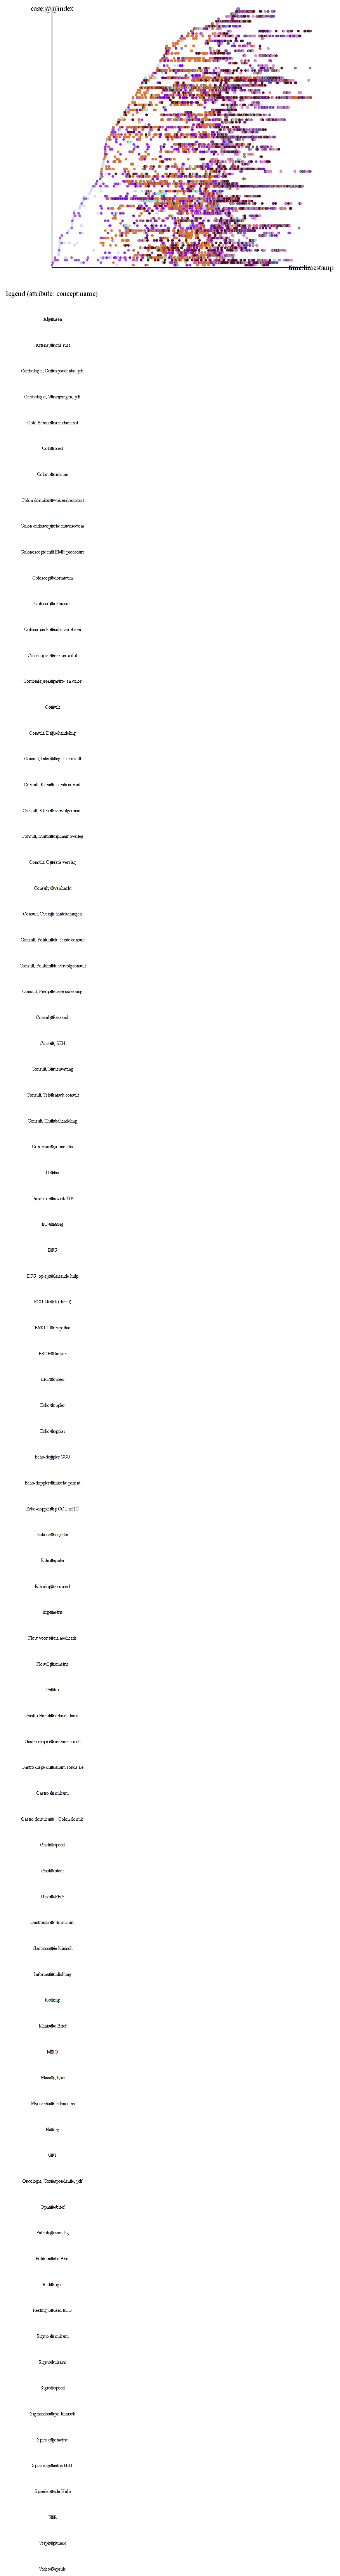

In [15]:
pm4py.view_dotted_chart(event_log)

In [16]:
# from pm4py.visualization.dotted_chart.variants import frequency

# gviz = frequency.apply(event_log)
# pm4py.visualization.common.save.save(gviz, "dotted_chart.png")



In [17]:
case_arrival = pm4py.get_case_arrival_average(df_verslagen)
case_arrival

np.float64(4231521.923076923)

In [18]:
# from pm4py.algo.filtering.log.variants import variants_filter
# # from pm4py.objects.conversion.log import converter as log_converter

# log = event_log

# # Extract unique variants (patient journey patterns)
# variants = variants_filter.get_variants(log)
# trace_list = ['->'.join(trace) for trace in variants.keys()]

# # Create a DataFrame mapping traces to frequency
# trace_counts = {trace: len(variants[trace]) for trace in trace_list}
# trace_df = pd.DataFrame(list(trace_counts.items()), columns=['Trace', 'Count'])

# # Sort by most common traces
# trace_df = trace_df.sort_values(by='Count', ascending=False)
# print(trace_df.head())  # Show most common patient journeys

from pm4py.algo.filtering.log.variants import variants_filter

# Extract unique variants (patient journey patterns)
variants = variants_filter.get_variants(event_log)

# Map original tuple traces to string traces
trace_mapping = {tuple(trace): '->'.join(trace) for trace in variants.keys()}

# Create a DataFrame mapping traces to frequency
trace_counts = {trace_mapping[trace]: len(variants[trace]) for trace in variants.keys()}

# Convert to DataFrame
trace_df = pd.DataFrame(list(trace_counts.items()), columns=['Trace', 'Count'])

# Sort by most common traces
trace_df = trace_df.sort_values(by='Count', ascending=False)

print(trace_df)  # Show most common patient journeys



                                                 Trace  Count
0    Consult, SEH->Consult, SEH->Consult, SEH->Cons...      1
1    Consult, Polikliniek: vervolgconsult->Consult-...      1
2    Consult, SEH->Spoedeisende Hulp->Consult, Klin...      1
3    Consult, SEH->Consult->Consult->Consult->Consu...      1
4    Consult, SEH->Consult->Consult->Consult->Consu...      1
..                                                 ...    ...
100  Consult->Consult->Consult->Consult->Consult->C...      1
101  Consult, SEH->Consult, SEH->Consult, Overige a...      1
102  Consult, SEH->Pathologieverslag->Consult, SEH-...      1
103  Consult, SEH->Consult, SEH->Consult, Kliniek: ...      1
104  Consult, SEH->Consult, SEH->Consult, SEH->Cons...      1

[105 rows x 2 columns]


In [19]:
trace_df

,Trace,Count
0,"Consult, SEH->Consult, SEH->Consult, SEH->Cons...",1
1,"Consult, Polikliniek: vervolgconsult->Consult-...",1
2,"Consult, SEH->Spoedeisende Hulp->Consult, Klin...",1
3,"Consult, SEH->Consult->Consult->Consult->Consu...",1
4,"Consult, SEH->Consult->Consult->Consult->Consu...",1
...,...,...
100,Consult->Consult->Consult->Consult->Consult->C...,1
101,"Consult, SEH->Consult, SEH->Consult, Overige a...",1
102,"Consult, SEH->Pathologieverslag->Consult, SEH-...",1
103,"Consult, SEH->Consult, SEH->Consult, Kliniek: ...",1


In [20]:
from pm4py.algo.transformation.log_to_features import algorithm as log_to_features
from sklearn.cluster import KMeans
import numpy as np

# Convert event log to feature vectors
feature_table, feature_names = log_to_features.apply(event_log, parameters={"feature_type": "frequency"})

# Convert to DataFrame
feature_df = pd.DataFrame(feature_table, columns=feature_names)

# Apply K-Means clustering (set k=3 for 3 clusters)
num_clusters = 10
kmeans = KMeans(n_clusters=num_clusters, random_state=42)
feature_df['Cluster'] = kmeans.fit_predict(feature_df)

feature_df.head()  # Show clustered patient traces


c:\Users\Y.vanMegen\AppData\Local\Programs\Python\Python311\Lib\site-packages\joblib\externals\loky\backend\context.py:136: UserWarning: Could not find the number of physical cores for the following reason:
[WinError 2] Het systeem kan het opgegeven bestand niet vinden
Returning the number of logical cores instead. You can silence this warning by setting LOKY_MAX_CPU_COUNT to the number of cores you want to use.
  warnings.warn(
  File "c:\Users\Y.vanMegen\AppData\Local\Programs\Python\Python311\Lib\site-packages\joblib\externals\loky\backend\context.py", line 257, in _count_physical_cores
    cpu_info = subprocess.run(
               ^^^^^^^^^^^^^^^
  File "c:\Users\Y.vanMegen\AppData\Local\Programs\Python\Python311\Lib\subprocess.py", line 548, in run
    with Popen(*popenargs, **kwargs) as process:
         ^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "c:\Users\Y.vanMegen\AppData\Local\Programs\Python\Python311\Lib\subprocess.py", line 1026, in __init__
    self._execute_child(args, executabl

,@@index,"concept:name_Consult,SEH",concept:name_Consult,"concept:name_Consult,Multidisciplinairoverleg","concept:name_Consult,Polikliniek:eersteconsult",concept:name_Pathologieverslag,"concept:name_Consult,Polikliniek:vervolgconsult","concept:name_Consult,Overigeaantekeningen","concept:name_Consult,Kliniek:eersteconsult","concept:name_Consult,Kliniek:vervolgconsult",...,concept:name_Sigmospoed,concept:name_ColonoscopiemetEMRprocedure,concept:name_Coloscopiedormicum,concept:name_Keuring,concept:name_ERCPKlinisch,concept:name_Gastrodiepeduodenumsonde,concept:name_ERCPspoed,concept:name_Echo-doppler,@@case_index,Cluster
0,154.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2
1,767.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,2
2,966.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2.0,2
3,1272.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,3.0,2
4,1867.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,4.0,2


In [37]:
import plotly.graph_objects as go
from collections import Counter

# Step 1: Extract Sequences from event columns
event_columns = [col for col in feature_df.columns if 'concept:name' in col]  # Filter for event-related columns
sequences = []

# For each row in feature_df, extract the sequence of events
for _, row in feature_df.iterrows():
    events = [col.split('concept:name_')[1] for col in event_columns if row[col] == 1.0]  # Get events with 1.0 value
    sequences.append('->'.join(events))  # Join events into a sequence

# Step 2: Add sequences to the dataframe (this will be useful for visualization)
feature_df['Sequence'] = sequences

# Step 3: Get the most common sequence per cluster 
cluster_sequences = feature_df.groupby("Cluster")["Sequence"].agg(lambda x: x.mode()[0])

# Step 4: Count the occurrences of each sequence (for Sankey diagram links)
cluster_counts = Counter(cluster_sequences)

# Step 5: Prepare data for Sankey diagram (convert sequences into sources and targets)
sources, targets = [], []

for trace in cluster_sequences.values:
    steps = trace.split("->")  # Split sequence into individual steps
    for i in range(len(steps) - 1):
        sources.append(steps[i])
        targets.append(steps[i + 1])

# Convert sources and targets to indices (for Sankey diagram nodes)
all_nodes = list(set(sources + targets))  # All unique nodes (steps)
source_indices = [all_nodes.index(s) for s in sources]
target_indices = [all_nodes.index(t) for t in targets]

# Step 6: Count the frequency of each link (source -> target pair)
link_counts = Counter(zip(sources, targets))
values = [link_counts[(source, target)] for source, target in zip(sources, targets)]

# Step 7: Create the Sankey diagram
fig = go.Figure(go.Sankey(
    node=dict(label=all_nodes),
    link=dict(source=source_indices, target=target_indices, value=values)
))

fig.show()


In [22]:
# import plotly.graph_objects as go
# from collections import Counter

# # Extract most common sequence per cluster
# # cluster_sequences = feature_df.groupby("Cluster").sum().idxmax(axis=1)
# # cluster_sequences = feature_df.groupby("Cluster")["SequenceColumn"].agg(lambda x: x.value_counts().idxmax())
# cluster_sequences = trace_df.groupby("Cluster")["Trace"].agg(lambda x: x.mode()[0])  # Most frequent trace per cluster
# cluster_counts = Counter(cluster_sequences)

# # Sankey Diagram Data Preparation
# sources, targets = [], []
# for trace in cluster_sequences.values:
#     steps = trace.split("->")
#     for i in range(len(steps) - 1):
#         sources.append(steps[i])
#         targets.append(steps[i + 1])

# # Convert to indices
# all_nodes = list(set(sources + targets))
# source_indices = [all_nodes.index(s) for s in sources]
# target_indices = [all_nodes.index(t) for t in targets]

# print('cluster_sequences:', cluster_sequences)
# print('cluster_counts:', cluster_counts)
# print(sources, targets)


# # Sankey Diagram
# fig = go.Figure(go.Sankey(
#     node=dict(label=all_nodes),
#     link=dict(source=source_indices, target=target_indices, value=list(cluster_counts.values()))
# ))
# fig.show()


In [23]:
# pip install plotly

In [24]:
# !pip install --upgrade nbformat

In [25]:
from collections import Counter

def get_sub_traces(trace, window_size):
    """Extracts sub-traces of a given window size from a full trace."""
    return ['->'.join(trace[i:i+window_size]) for i in range(len(trace) - window_size + 1)]

# Extract unique variants (trace paths)
from pm4py.algo.filtering.log.variants import variants_filter
variants = variants_filter.get_variants(event_log)
# print('variants', variants)

# Convert traces from tuples to lists
trace_list = [list(trace) for trace in variants.keys()]
# print('trace_list', trace_list)

# Extract all sub-traces
window_size = 10  # Adjust window size as needed
all_sub_traces = [sub_trace for trace in trace_list for sub_trace in get_sub_traces(trace, window_size)]
# print('all_sub_traces', all_sub_traces)

# Count frequency of sub-traces
sub_trace_counts = Counter(all_sub_traces)

# Convert to DataFrame for sorting
import pandas as pd
sub_trace_df = pd.DataFrame(sub_trace_counts.items(), columns=['Sub-Trace', 'Count'])
sub_trace_df = sub_trace_df.sort_values(by='Count', ascending=False)

print(sub_trace_df.head(10))  # Show most common sub-traces


                                              Sub-Trace  Count
242   Consult, Kliniek: vervolgconsult->Consult, Kli...    151
61    Consult->Consult->Consult->Consult->Consult->C...    120
2802  Consult, Kliniek: vervolgconsult->Consult, Kli...     27
4675  Consult, Kliniek: vervolgconsult->Consult, Kli...     25
62    Consult->Consult->Consult->Consult->Consult->C...     22
4674  Consult, Kliniek: vervolgconsult->Consult, Kli...     22
63    Consult->Consult->Consult->Consult->Consult->C...     21
5341  Consult, Kliniek: vervolgconsult->Consult, Kli...     19
4673  Consult->Consult, Kliniek: vervolgconsult->Con...     18
65    Consult->Consult->Consult->Consult->Consult->C...     18


In [26]:
sub_trace_df

,Sub-Trace,Count
242,"Consult, Kliniek: vervolgconsult->Consult, Kli...",151
61,Consult->Consult->Consult->Consult->Consult->C...,120
2802,"Consult, Kliniek: vervolgconsult->Consult, Kli...",27
4675,"Consult, Kliniek: vervolgconsult->Consult, Kli...",25
62,Consult->Consult->Consult->Consult->Consult->C...,22
...,...,...
11,"Consult->Consult, Polikliniek: eerste consult-...",1
12,"Consult, Polikliniek: eerste consult->Consult,...",1
13,"Consult, Multidisciplinair overleg->Consult->C...",1
14,Consult->Consult->Consult->Pathologieverslag->...,1


In [27]:
sub_trace_df.iloc[10][0]

C:\Users\Y.vanMegen\AppData\Local\Temp\ipykernel_25356\3598988830.py:1: FutureWarning:

Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`



'Consult->Consult->Consult->Consult->Consult->Consult, Polikliniek: vervolgconsult->Consult->Consult->Consult->Consult'

In [28]:
def diversity_score(sub_trace_counts):
    unique_sub_traces = len(sub_trace_counts)
    total_sub_traces = sum(sub_trace_counts.values())
    return unique_sub_traces / total_sub_traces  # Ratio of unique sequences

for n in range(2, 10):
    all_sub_traces = [sub_trace for trace in trace_list for sub_trace in get_sub_traces(trace, n)]
    sub_trace_counts = Counter(all_sub_traces)
    
    score = diversity_score(sub_trace_counts)
    print(f"Window Size {n}: Diversity Score = {score:.4f}")


Window Size 2: Diversity Score = 0.0301
Window Size 3: Diversity Score = 0.1181
Window Size 4: Diversity Score = 0.2746
Window Size 5: Diversity Score = 0.4597
Window Size 6: Diversity Score = 0.6218
Window Size 7: Diversity Score = 0.7464
Window Size 8: Diversity Score = 0.8337
Window Size 9: Diversity Score = 0.8912


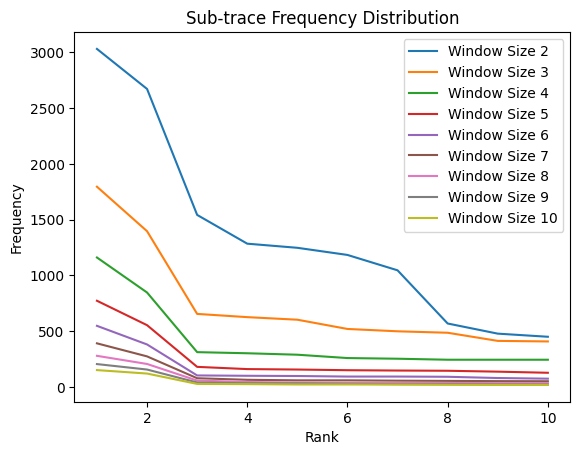

In [29]:
import matplotlib.pyplot as plt
from collections import Counter

# Function to test different window sizes
def test_window_sizes(trace_list, max_n=10):
    for window_size in range(2, max_n + 1):
        all_sub_traces = [sub_trace for trace in trace_list for sub_trace in get_sub_traces(trace, window_size)]
        sub_trace_counts = Counter(all_sub_traces)
        
        # Get top 10 frequent sub-traces
        top_counts = sorted(sub_trace_counts.values(), reverse=True)[:10]
        
        plt.plot(range(1, len(top_counts) + 1), top_counts, label=f'Window Size {window_size}')

    plt.xlabel('Rank')
    plt.ylabel('Frequency')
    plt.title('Sub-trace Frequency Distribution')
    plt.legend()
    plt.show()

test_window_sizes(trace_list)


In [42]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.cluster import KMeans

# Convert full traces into "sentences" (for NLP processing)
trace_sentences = [' '.join(trace) for trace in trace_list]

# Apply TF-IDF Vectorization
vectorizer = TfidfVectorizer()
X = vectorizer.fit_transform(trace_sentences)

# Cluster Traces Using K-Means
num_clusters = 3  # Change based on your data
kmeans = KMeans(n_clusters=num_clusters, random_state=42)
trace_clusters = kmeans.fit_predict(X)

# Add cluster labels to traces
clustered_traces = pd.DataFrame({'Trace': trace_sentences, 'Cluster': trace_clusters})
print(clustered_traces.sort_values(by='Cluster'))


                                                 Trace  Cluster
0    Consult, SEH Consult, SEH Consult, SEH Consult...        0
3    Consult, SEH Consult Consult Consult Consult C...        0
13   Consult, Polikliniek: eerste consult Consult, ...        0
11   Pathologieverslag Consult, SEH Consult, SEH Co...        0
14   Consult, Polikliniek: eerste consult Consult, ...        0
..                                                 ...      ...
84   Consult, Polikliniek: eerste consult Consult C...        2
73   Consult, Polikliniek: eerste consult Consult C...        2
101  Consult, SEH Consult, SEH Consult, Overige aan...        2
99   Consult Consult Consult, Polikliniek: vervolgc...        2
100  Consult Consult Consult Consult Consult Consul...        2

[105 rows x 2 columns]


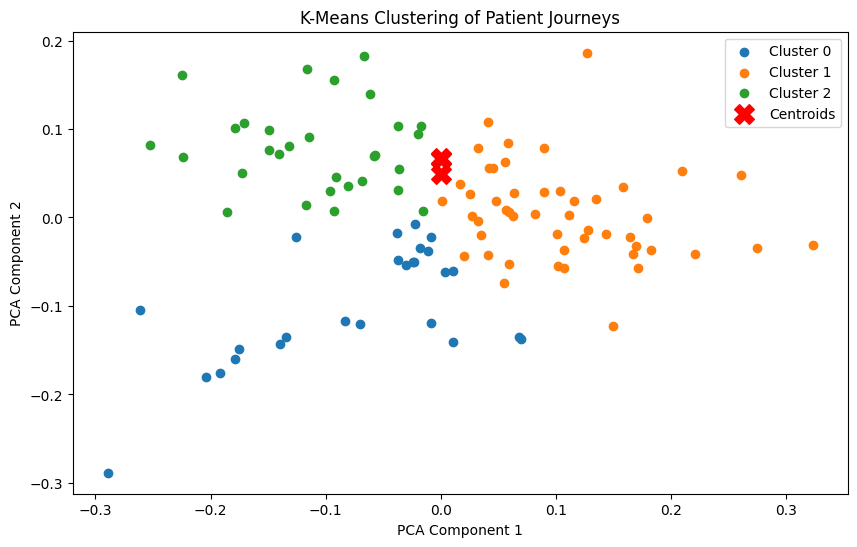

In [31]:
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.cluster import KMeans

# Convert traces to "sentences"
trace_sentences = [' '.join(trace) for trace in trace_list]

# Apply TF-IDF
vectorizer = TfidfVectorizer()
X = vectorizer.fit_transform(trace_sentences)

# Apply K-Means clustering
num_clusters = 3  # Adjust based on data
kmeans = KMeans(n_clusters=num_clusters, random_state=42)
clusters = kmeans.fit_predict(X)

# Reduce dimensions using PCA
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X.toarray())

# Plot clusters
plt.figure(figsize=(10, 6))
for i in range(num_clusters):
    plt.scatter(X_pca[clusters == i, 0], X_pca[clusters == i, 1], label=f'Cluster {i}')

plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], 
            s=200, c='red', marker='X', label='Centroids')

plt.xlabel('PCA Component 1')
plt.ylabel('PCA Component 2')
plt.title('K-Means Clustering of Patient Journeys')
plt.legend()
plt.show()

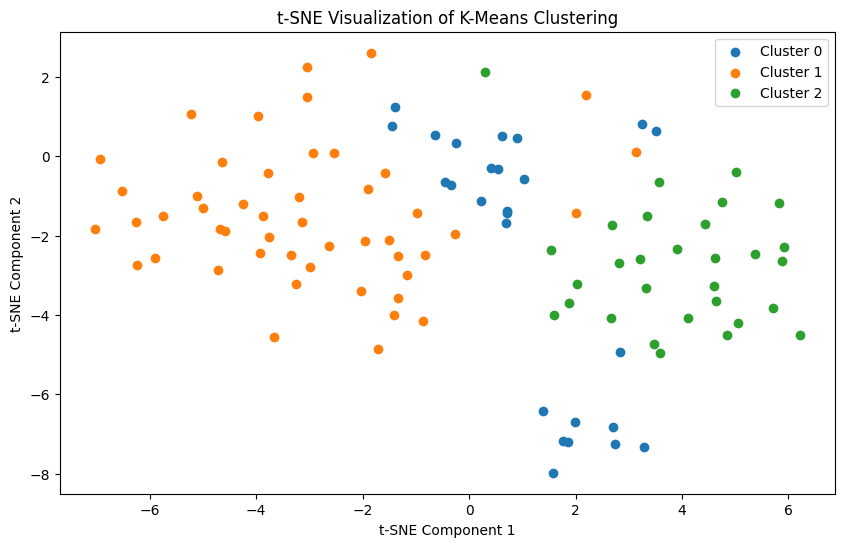

In [32]:
from sklearn.manifold import TSNE

# Reduce dimensions using t-SNE
tsne = TSNE(n_components=2, perplexity=30, random_state=42)
X_tsne = tsne.fit_transform(X.toarray())

# Plot clusters
plt.figure(figsize=(10, 6))
for i in range(num_clusters):
    plt.scatter(X_tsne[clusters == i, 0], X_tsne[clusters == i, 1], label=f'Cluster {i}')

plt.xlabel('t-SNE Component 1')
plt.ylabel('t-SNE Component 2')
plt.title('t-SNE Visualization of K-Means Clustering')
plt.legend()
plt.show()


In [ ]:
import plotly.graph_objects as go
import numpy as np

# Ensure clusters is a NumPy array of integers
clusters = np.array(clusters, dtype=int)

# Verify the number of clusters
num_clusters = len(np.unique(clusters))

trace_sentences = np.array(trace_sentences)
# print(trace_sentences)

# Sample patient journey per cluster
sample_traces = {i: trace_sentences[clusters == i][:5] for i in range(num_clusters)}

# Create Sankey diagram
fig = go.Figure()
for i, (cluster, traces) in enumerate(sample_traces.items()):
    fig.add_trace(go.Sankey(
        node=dict(
            pad=15, thickness=20,
            label=['Start'] + [f'Step {j+1}' for j in range(len(traces[0].split()))]
        ),
        link=dict(
            source=[0] * len(traces),
            target=list(range(1, len(traces[0].split()) + 1)),
            value=[1] * len(traces)
        )
    ))

fig.update_layout(title_text="Sankey Diagram of Clustered Patient Journeys")
fig.show()


['Consult, SEH Consult, SEH Consult, SEH Consult, SEH Consult Consult, SEH Consult, SEH Consult Consult, Multidisciplinair overleg Consult, SEH Consult, SEH Consult Consult, Polikliniek: eerste consult Consult, Multidisciplinair overleg Consult Consult Consult Pathologieverslag Consult Consult, Polikliniek: vervolgconsult Consult, Polikliniek: vervolgconsult Consult Consult Consult, Multidisciplinair overleg Consult Consult Consult Consult Consult, Polikliniek: vervolgconsult Consult Consult Consult Consult, Polikliniek: vervolgconsult Consult Consult Consult Consult Consult, Overige aantekeningen Consult Consult, Overige aantekeningen Consult Consult, Overige aantekeningen Consult Consult Consult Consult Consult Consult Consult, Overige aantekeningen Consult, Overige aantekeningen Consult, Polikliniek: eerste consult Consult Consult Pathologieverslag Consult, Polikliniek: vervolgconsult Consult Consult Consult Consult, SEH Consult, SEH Consult, Multidisciplinair overleg Consult Consul